In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [55]:
xs = iris.data
len(xs)

150

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='|S10')

In [31]:
import random

def train_test(n, split):
    train, test = [], []
    for i in range(n):
        if random.random() < split:
            train.append(i)
        else:
            test.append(i)
    return train, test

def train_test2(n, split):
    ns = range(n)
    random.shuffle(ns)
    return ns[:int(n * split)], ns[int(n * split):]

train_idx, test_idx = train_test2(150, 0.8)
print train_idx
print test_idx

[87, 29, 55, 70, 75, 67, 138, 141, 103, 132, 13, 91, 62, 73, 139, 37, 100, 127, 93, 84, 134, 19, 129, 52, 128, 46, 82, 41, 21, 112, 40, 34, 57, 10, 140, 144, 117, 74, 136, 23, 77, 115, 106, 9, 81, 126, 45, 54, 59, 64, 33, 116, 95, 14, 38, 122, 2, 119, 3, 68, 142, 53, 80, 107, 83, 35, 15, 26, 31, 97, 145, 121, 0, 104, 86, 5, 25, 42, 22, 110, 113, 4, 130, 99, 6, 78, 114, 90, 125, 49, 56, 148, 60, 11, 48, 102, 105, 66, 17, 76, 39, 12, 143, 36, 18, 7, 94, 85, 124, 96, 50, 137, 89, 123, 88, 146, 71, 43, 98, 111]
[118, 135, 20, 120, 47, 149, 108, 63, 27, 147, 44, 72, 16, 1, 65, 61, 109, 8, 69, 32, 133, 131, 30, 28, 92, 51, 79, 58, 101, 24]


In [40]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='|S10')

In [46]:
import numpy as np

ys = np.array([iris.target_names[i] for i in iris.target])

In [45]:
ys[test_idx]

array(['virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'setosa'],
      dtype='|S10')

In [60]:
euclidean = lambda p, q: sum([(p[i] - q[i])**2
                              for i in range(len(p))])**0.5

euclidean(xs[0], xs[99])

3.0577769702841309

In [84]:
def neighbors_idx(xs, x, k):
    dist = [(euclidean(x, xs[i]), i)
            for i in range(len(xs))]
    dist.sort()
    return [d[1] for d in dist[:k]]

ns = neighbors_idx(xs[train_idx], xs[test_idx][0], 5)
for i in ns:
    print xs[train_idx][i], ys[train_idx][i]

[ 7.7  2.8  6.7  2. ] virginica
[ 7.6  3.   6.6  2.1] virginica
[ 7.3  2.9  6.3  1.8] virginica
[ 7.4  2.8  6.1  1.9] virginica
[ 7.7  3.8  6.7  2.2] virginica


In [98]:
def classify(xs, ys, x, k):
    ns = neighbors_idx(xs, x, k)
    d = {}
    for idx in ns:
        if ys[idx] in d:
            d[ys[idx]] += 1
        else:
            d[ys[idx]] = 1
    d = sorted(d.iteritems(), key=lambda(k,v):v, reverse=True)
    return d[0][0]

classify(xs[train_idx], ys[train_idx], xs[test_idx][0], int(150*.8))

'versicolor'

0.9632 0.0187018715641


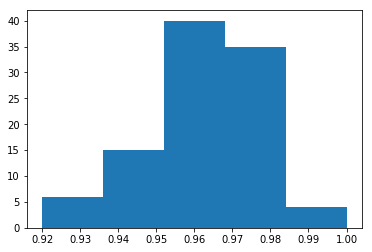

In [139]:
def accuracy(xs, ys, (train_idx, test_idx), k):
    correct = 0
    for i in test_idx:
        answer = classify(xs[train_idx], ys[train_idx], xs[i], k)
        if ys[i] == answer:
            correct += 1
    return 1.0 * correct / len(test_idx)

acs = np.array([accuracy(xs, ys, train_test2(len(ys), 2./3), 5)
               for _ in range(100)])

print acs.mean(), acs.std()

from matplotlib import pyplot as plt
plt.hist(acs, bins=5)
plt.show()

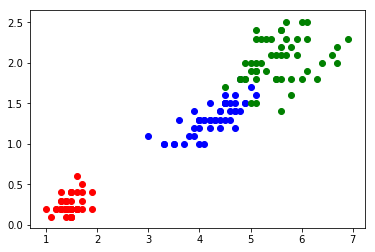

In [115]:
s1, s2, s3 = [], [], []

iris.target_names
for i in range(len(ys)):
    if ys[i] == 'setosa':
        s1.append(xs[i])
    if ys[i] == 'versicolor':
        s2.append(xs[i])
    if ys[i] == 'virginica':
        s3.append(xs[i])
s1, s2, s3 = np.array(s1), np.array(s2), np.array(s3)

plt.scatter(s1[:, 2], s1[:, 3], color='red')
plt.scatter(s2[:, 2], s2[:, 3], color='blue')
plt.scatter(s3[:, 2], s3[:, 3], color='green')
plt.show()

In [138]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(4)
knn.fit(xs[train_idx], ys[train_idx])
predicts = knn.predict(xs[test_idx])


print accuracy(xs, ys, (train_idx, test_idx), 4)
print accuracy_score(predicts, ys[test_idx])

0.966666666667
0.966666666667
